# Módulo 1: Análisis de datos en el ecosistema Python

### Sesión (22)

**19/02/2024**

## Distribution based clustering

El agrupamiento basado en distribución es un tipo de algoritmo de clustering que asume que los puntos de datos en un cluster o grupo **se generan a partir de una distribución de probabilidad**. Esto quiere decir que los datos del mismo grupo **provienen de la misma distribución estadística subyacente**.

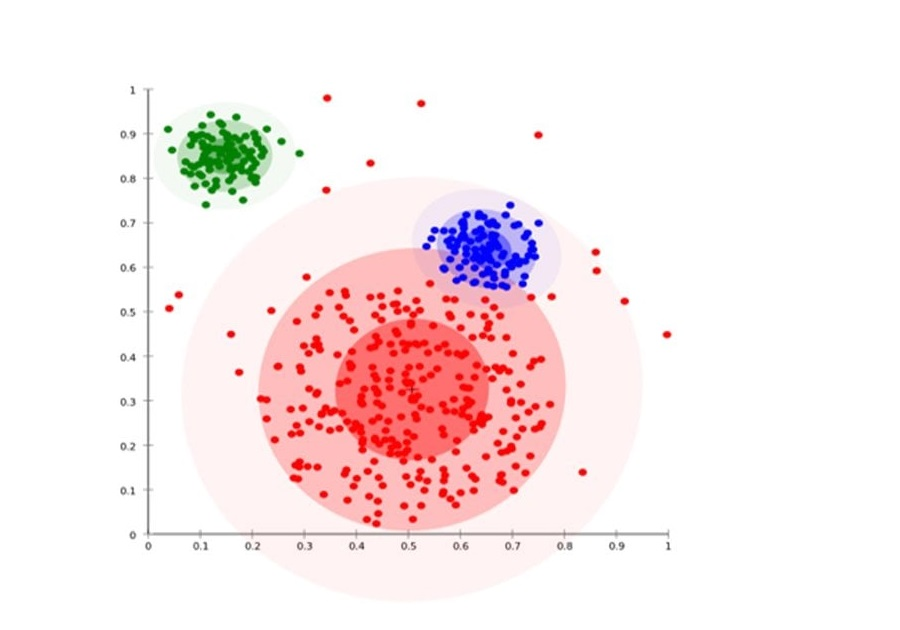

### Gaussian Mixture Models (GMM)

El tipo más común de agrupamiento basado en distribución son los **modelos de mezcla gaussiana** o *Gaussian Mixture Models*. El ***GMM*** es un modelo probabilístico que representa **una mezcla de distribuciones gaussianas**, cada una de las cuales corresponde a un grupo diferente. El modelo estima los parámetros de las distribuciones gaussianas que mejor se ajustan a los datos y asigna cada punto de datos al grupo que maximiza su probabilidad de pertenecer a ese grupo.

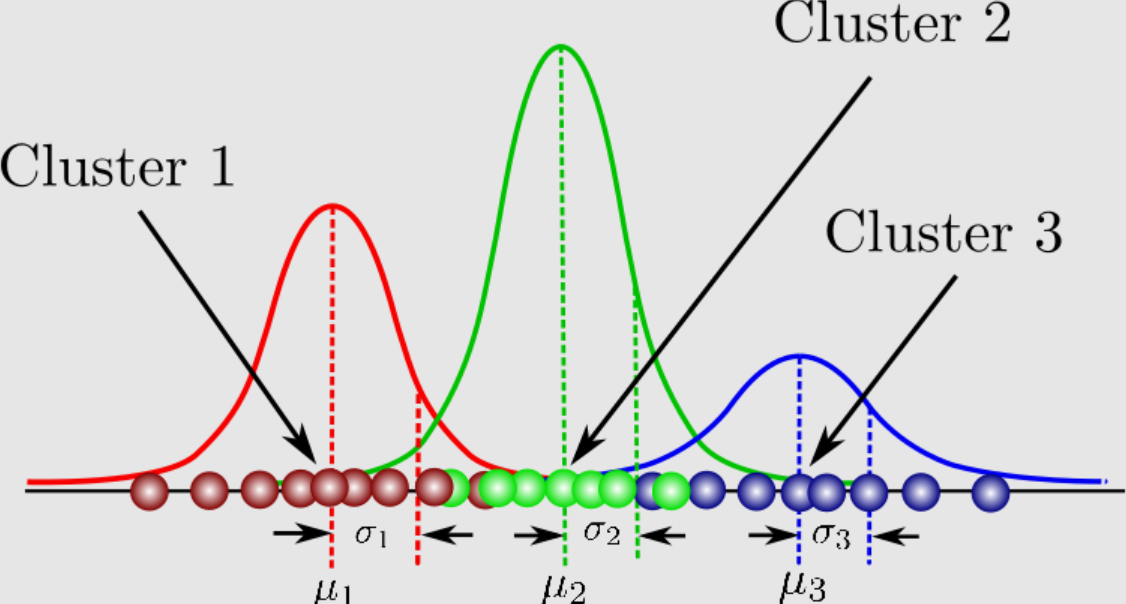

El modelo ***GMM*** tiene como objetivo encontrar los parámetros de cada distribución gaussiana, dado el número de distribuciones óptimas. Los pasos para aplicar el algoritmo _GMM_ son los siguientes:

- **Inicialización**: Se selecciona el **número de distribuciones** gaussianas y **se inicializan las medias y las varianzas** de cada distribución.

- **Expectativa**: Se calcule la **probabilidad** de que cada punto de datos pertenezca a cada distribución gaussiana.

- **Maximización**: Se vuelven a **estimar las medias, las covarianzas y los coeficientes de mezcla** utilizando las probabilidades calculadas en el paso anterior.

- **Convergencia**: Se repiten los pasos de _Expectativa_ y _Maximización_ hasta que la probabilidad logarítmica de los datos **ya no se aumente significativamente**.

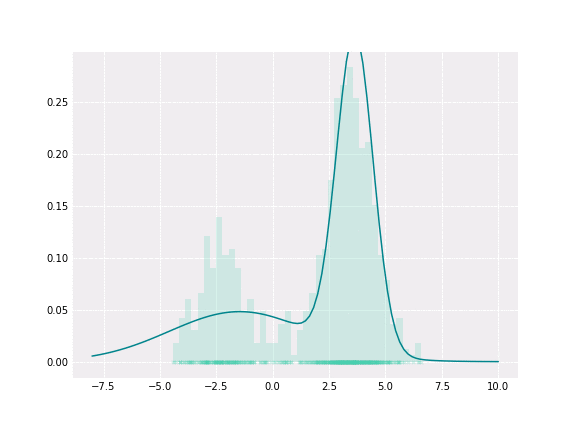

A pesar de que los modelos de tipo `GaussianMixture` de la librería _sklearn_ requieren **saber a periori el número de los clusters** al igual que el algoritmo _KMeans_, disponen de un método propio llamado `bic()` para calcular el criterio de información Bayesiana que **facilita el hecho de encontrar el número óptimo** de los clusters presentes en el conjunto de datos.

Ahora amos a crear un set de datos con un **número considerable de clústeres** y una **varianza mayor que la unidad**, con el fin de comprobar diferentes métricas de rendimiento de clustering y agrupar los datos mediante el algoritmo _GMM_:

In [ ]:
# importamos las librerías necesarias 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
# Modificamos los parámetros de los gráficos en matplotlib
from matplotlib.pyplot import rcParams

rcParams['figure.figsize'] = 18, 8 # el primer dígito es el ancho y el segundo el alto
rcParams["font.weight"] = "bold"
rcParams["font.size"] = 10
rcParams["axes.labelweight"] = "bold"

In [ ]:
# Generar el datset sintético
from sklearn.datasets import make_blobs
datos_sint, etiquetas_sint, centroides_sint = make_blobs(n_samples=1000, centers=8, cluster_std=1.28, return_centers=True, random_state=10)
sns.scatterplot(x=datos_sint[:,0], y=datos_sint[:,1])
plt.title("Datos sintéticos sin etiquetas")
plt.show()

Como se puede ver, el conjunto de datos contiene varios grupos que tampoco son fáciles de distinguir de forma visual.

In [ ]:
# Pintar los datos según el cluster y con sus centros
sns.scatterplot(x=datos_sint[:,0], y=datos_sint[:,1], hue=etiquetas_sint)
sns.scatterplot(x=centroides_sint[:,0], y=centroides_sint[:,1], color='green', s=90, label='Centroides')
plt.title("Datos sintéticos etiquetados")
plt.show()

Estandarizamos los datos a continuación:

In [ ]:
from sklearn.preprocessing import StandardScaler

escalado_sint= StandardScaler().fit(datos_sint)
datos_sint_norm = escalado_sint.transform(datos_sint)
datos_sint_norm

Empezamos a **analizar distintos criterios** que hemos estudiado hasta ahora con el objetivo de encontrar el número de grupos en los datos, para realizar un ejercicio de **aprendizaje no-supervisado**.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
distor_clust = []
for k in range(2, 15):
    modelo_km = KMeans(n_clusters=k, random_state=100)
    modelo_km.fit(datos_sint_norm)
    distor_clust.append(modelo_km.inertia_)

# Obtener una visualización más elaborada 
plt.figure(figsize=(16, 7))
sns.lineplot(x=range(2,15), y=distor_clust, color='green', label='WSS versus K', linewidth=3)
plt.xticks(range(2,15))
plt.title("Suma de la distancia al cuadrado de cada punto a su centroide", fontsize=16)
plt.xlabel("Número de Clusters", fontsize=14)
plt.ylabel("WSS", fontsize=14)
plt.show()

In [ ]:
sil_clust = []
for k in range(2, 15):
    modelo_km = KMeans(n_clusters=k, random_state=100)
    modelo_km.fit(datos_sint_norm)
    y_modelo_km = modelo_km.predict(datos_sint_norm)
    sil_clust.append(silhouette_score(datos_sint_norm, y_modelo_km))

# Obtener una visualización del valor de silueta
plt.figure(figsize=(16, 7))
sns.lineplot(x=range(2,15), y=sil_clust, color='green', label='silueta versus K', linewidth=3)
plt.xticks(range(2,15))
plt.title("Distancia media dentro del grupo (a) entre la distancia media del grupo más cercano (b)")
plt.xlabel("Número de Clusters", fontsize=14)
plt.ylabel("silhouette_score", fontsize=14)
plt.show()

In [ ]:
from sklearn.metrics import davies_bouldin_score
dav_clust = []
for k in range(2, 15):
    modelo_km = KMeans(n_clusters=k, random_state=100)
    modelo_km.fit(datos_sint_norm)
    y_modelo_km = modelo_km.predict(datos_sint_norm)
    dav_clust.append(davies_bouldin_score(datos_sint_norm, y_modelo_km))

# Obtener una visualización del valor de silueta
plt.figure(figsize=(16, 7))
sns.lineplot(x=range(2,15), y=dav_clust, color='green', label='the Davies-Bouldin score versus K', linewidth=3)
plt.xticks(range(2,15))
plt.title("Davies-Bouldin index")
plt.xlabel("Número de Clusters", fontsize=14)
plt.ylabel("davies_bouldin_score", fontsize=14)
plt.show()


In [ ]:
from sklearn.metrics import calinski_harabasz_score
calinsk_clust = []
for k in range(2, 15):
    modelo_km = KMeans(n_clusters=k, random_state=100)
    modelo_km.fit(datos_sint_norm)
    y_modelo_km = modelo_km.predict(datos_sint_norm)
    calinsk_clust.append(calinski_harabasz_score(datos_sint_norm, y_modelo_km))

# Obtener una visualización del valor de silueta
plt.figure(figsize=(16, 7))
sns.lineplot(x=range(2,15), y=calinsk_clust, color='green', label='Calinski and Harabasz score versus K', linewidth=3)
plt.xticks(range(2,15))
plt.title("Variance Ratio Criterion")
plt.xlabel("Número de Clusters", fontsize=14)
plt.ylabel("calinski_harabasz_score", fontsize=14)
plt.show()


Los criterios de información bayesianos (***BIC***) son una medida del ajuste del modelo que miden de alguna manera el **equilibrio** entre la **complejidad del modelo** y la **calidad** del ajuste (_goodness of fit_). 

- cuando el **número de clusters** es demasiado **pequeño**, el BIC será **grande** debido a la **deficiencia del modelo**.
- cuando el **número de clústeres es demasiado grande**, el BIC también será **grande** debido a la **mayor complejidad del modelo**. 

Así que **el número óptimo de clusters** es el que **minimiza el _BIC_**. 

In [ ]:
import math
def bic_score(X, labels):
  """
  BIC score for the goodness of fit of clusters.
  """
    
  n_points = len(labels)
  n_clusters = len(set(labels))
  n_dimensions = X.shape[1]

  n_parameters = (n_clusters - 1) + (n_dimensions * n_clusters) + 1

  loglikelihood = 0
  for label_name in set(labels):
    X_cluster = X[labels == label_name]
    n_points_cluster = len(X_cluster)
    centroid = np.mean(X_cluster, axis=0)
    variance = np.sum((X_cluster - centroid) ** 2) / (len(X_cluster) - 1)
    loglikelihood += \
      n_points_cluster * np.log(n_points_cluster) \
      - n_points_cluster * np.log(n_points) \
      - n_points_cluster * n_dimensions / 2 * np.log(2 * math.pi * variance) \
      - (n_points_cluster - 1) / 2
    
  bic = loglikelihood - (n_parameters / 2) * np.log(n_points)
        
  return -bic

In [ ]:
bic_clust = []
for k in range(2, 15):
    modelo_km = KMeans(n_clusters=k, random_state=100)
    modelo_km.fit(datos_sint_norm)
    y_modelo_km = modelo_km.predict(datos_sint_norm)
    bic_clust.append(bic_score(datos_sint_norm, y_modelo_km))

# Obtener una visualización del valor de silueta
plt.figure(figsize=(16, 7))
sns.lineplot(x=range(2,15), y=bic_clust, color='green', label='BIC score versus K', linewidth=3)
plt.xticks(range(2,15))
plt.title("Bayesian Information Criterion")
plt.xlabel("Número de Clusters", fontsize=14)
plt.ylabel("bic_score", fontsize=14)
plt.show()


Ahora graficamos la evolución del valor de _BIC_ que se mide para los modelos tipo _GMM_.

In [ ]:
from sklearn.mixture import GaussianMixture

bic_gmm = []
for k in range(2, 15):
    modelo_gmm = GaussianMixture(n_components=k, random_state=100)
    modelo_gmm.fit(datos_sint_norm)
    bic_gmm.append(modelo_gmm.bic(datos_sint_norm))

# Obtener una visualización del valor de silueta
plt.figure(figsize=(16, 7))
sns.lineplot(x=range(2,15), y=bic_gmm, color='green', label='BIC score of GMM Model versus K', linewidth=3)
plt.xticks(range(2,15))
plt.title("Bayesian Information Criterion (GMM-based)")
plt.xlabel("Número de Clusters", fontsize=14)
plt.ylabel("bic_score (GMM)", fontsize=14)
plt.show()


Comprobamos si el algoritmo **Mrean Shift** es capaz de intuir el número de los grupos originales que están presentes en el conjunto de datos

In [ ]:
from sklearn.cluster import MeanShift

modelo_ms_sint = MeanShift(bin_seeding=True)

modelo_ms_sint.fit(datos_sint_norm)

y_etiquetas_ms_sint = modelo_ms_sint.labels_

centros_ms_sint = modelo_ms_sint.cluster_centers_

print("Silhouette score = ", silhouette_score(datos_sint_norm, y_etiquetas_ms_sint))

# Graficar los resultados
sns.scatterplot(x=datos_sint_norm[:,0], y=datos_sint_norm[:,1], hue=y_etiquetas_ms_sint)
sns.scatterplot(x=centros_ms_sint[:,0], y=centros_ms_sint[:,1], color='blue', s=60, label='cluster_centers')
plt.title("Clustering con Mean Shift")
plt.show()

Un vez que hayamos estimado el número de los clusters en el dataset, podemos usar el método `GaussianMixture` para crear el algoritmo de clustering.

In [ ]:
from sklearn.mixture import GaussianMixture
model_gmm = GaussianMixture(n_components=8, random_state=100)

model_gmm.fit(datos_sint_norm)

y_etiquetas_gmm = model_gmm.predict(datos_sint_norm)

centros_clust_gmm = model_gmm.means_

print("Silhouette score = ", silhouette_score(datos_sint_norm, y_etiquetas_gmm))

# Transformar los centros de clusters a la escala estándar para visualizarlos
centroides_sint_norm = escalado_sint.transform(centroides_sint)

# Graficar los resultados
sns.scatterplot(x=datos_sint_norm[:,0], y=datos_sint_norm[:,1], hue=y_etiquetas_gmm)
sns.scatterplot(x=centroides_sint_norm[:,0], y=centroides_sint_norm[:,1], color='green', s=90, label='Centroides')
sns.scatterplot(x=centros_clust_gmm[:,0], y=centros_clust_gmm[:,1], color='blue', s=60, label='Centers (GMM)')

plt.title("Clustering con GMM")
plt.show()

---

### Ejemplo con datos heterocedásticos

En estadística, la **homocedasticidad** se refiere a la propiedad de **tener varianzas iguales** en todos los grupos o subpoblaciones, mientras que la **heterocedasticidad** se refiere a la propiedad de **tener varianzas desiguales** en todos los grupos o clustres presentes en el conjunto de datos.

In [ ]:
datos2, etiquetas2, centros2 = make_blobs(n_samples=1000, centers=3, cluster_std=[1, 2.5, 0.5],
                                                        return_centers=True, random_state=88)


sns.scatterplot(x=datos2[:,0], y=datos2[:,1], hue=etiquetas2)
sns.scatterplot(x=centros2[:,0], y=centros2[:,1], color='green', s=90, label='Centroides')
plt.title("Datos sintéticos heterocedásticos")
plt.show()

In [ ]:
# Normalizar los datos
from sklearn.preprocessing import StandardScaler

escalado2 = StandardScaler().fit(datos2)
datos2_norm = escalado2.transform(datos2)
datos2_norm

In [ ]:
# Verificar las características de los valores estandarizados
display(pd.DataFrame(datos2).describe().round(2))
display(pd.DataFrame(datos2_norm).describe().round(2))

Después de normalizar los datos miramos si somos capaces de estimar el número óptimo de los clustres en el conjunto de datos.

In [ ]:
distor_clust = []
for k in range(1, 15):
    modelo_km = KMeans(n_clusters=k, random_state=100)
    modelo_km.fit(datos2_norm)
    distor_clust.append(modelo_km.inertia_)

# Obtener una visualización más elaborada 
plt.figure(figsize=(16, 7))
sns.lineplot(x=range(1,15), y=distor_clust, color='green', label='SSE versus K', linewidth=3)
plt.xticks(range(1,15))
plt.title("Suma de la distancia al cuadrado de cada punto a su centroide", fontsize=16)
plt.xlabel("Número de Clusters", fontsize=14)
plt.ylabel("SSE", fontsize=14)
plt.show()

In [ ]:
sil_clust = []
for k in range(2, 15):
    modelo_km = KMeans(n_clusters=k, random_state=100)
    modelo_km.fit(datos2_norm)
    y_modelo_km = modelo_km.predict(datos2_norm)
    sil_clust.append(silhouette_score(datos2_norm, y_modelo_km))

# Obtener una visualización del valor de silueta
plt.figure(figsize=(16, 7))
sns.lineplot(x=range(2,15), y=sil_clust, color='green', label='silueta versus K', linewidth=3)
plt.xticks(range(1,15))
plt.title("Distancia media dentro del grupo (a) entre la distancia media del grupo más cercano (b)")
plt.xlabel("Número de Clusters", fontsize=14)
plt.ylabel("silhouette_score", fontsize=14)
plt.show()

In [ ]:
from sklearn.metrics import davies_bouldin_score
dav_clust = []
for k in range(2, 15):
    modelo_km = KMeans(n_clusters=k, random_state=100)
    modelo_km.fit(datos2_norm)
    y_modelo_km = modelo_km.predict(datos2_norm)
    dav_clust.append(davies_bouldin_score(datos2_norm, y_modelo_km))

# Obtener una visualización del valor de silueta
plt.figure(figsize=(16, 7))
sns.lineplot(x=range(2,15), y=dav_clust, color='green', label='the Davies-Bouldin score versus K', linewidth=3)
plt.xticks(range(1,15))
plt.title("Davies-Bouldin index")
plt.xlabel("Número de Clusters", fontsize=14)
plt.ylabel("davies_bouldin_score", fontsize=14)
plt.show()


In [ ]:
from sklearn.metrics import calinski_harabasz_score
calinsk_clust = []
for k in range(2, 15):
    modelo_km = KMeans(n_clusters=k, random_state=100)
    modelo_km.fit(datos2_norm)
    y_modelo_km = modelo_km.predict(datos2_norm)
    calinsk_clust.append(calinski_harabasz_score(datos2_norm, y_modelo_km))

# Obtener una visualización del valor de silueta
plt.figure(figsize=(16, 7))
sns.lineplot(x=range(2,15), y=calinsk_clust, color='green', label='Calinski and Harabasz score versus K', linewidth=3)
plt.xticks(range(1,15))
plt.title("Variance Ratio Criterion")
plt.xlabel("Número de Clusters", fontsize=14)
plt.ylabel("calinski_harabasz_score", fontsize=14)
plt.show()


In [ ]:
bic_clust = []
for k in range(2, 15):
    modelo_km = KMeans(n_clusters=k, random_state=100)
    modelo_km.fit(datos2_norm)
    y_modelo_km = modelo_km.predict(datos2_norm)
    bic_clust.append(bic_score(datos2_norm, y_modelo_km))

# Obtener una visualización del valor de silueta
plt.figure(figsize=(16, 7))
sns.lineplot(x=range(2,15), y=bic_clust, color='green', label='BIC score versus K', linewidth=3)
plt.xticks(range(1,15))
plt.title("Bayesian Information Criterion")
plt.xlabel("Número de Clusters", fontsize=14)
plt.ylabel("bic_score", fontsize=14)
plt.show()


In [ ]:
from sklearn.mixture import GaussianMixture

bic_gmm = []
for k in range(2, 15):
    modelo_gmm = GaussianMixture(n_components=k, random_state=100)
    modelo_gmm.fit(datos2_norm)
    bic_gmm.append(modelo_gmm.bic(datos2_norm))

# Obtener una visualización del valor de silueta
plt.figure(figsize=(16, 7))
sns.lineplot(x=range(2,15), y=bic_gmm, color='green', label='BIC score of GMM Model versus K', linewidth=3)
plt.xticks(range(2,15))
plt.title("Bayesian Information Criterion (GMM-based)")
plt.xlabel("Número de Clusters", fontsize=14)
plt.ylabel("bic_score", fontsize=14)
plt.show()

Procedemos también a crear un modelo de clustering usando la técnica de ***Mean Shift*** que no requiere conocer el hiperparametro de `K` a periori. 

In [ ]:
from sklearn.cluster import MeanShift

modelo_ms = MeanShift(bin_seeding=True)

modelo_ms.fit(datos2_norm)

y_etiquetas_ms = modelo_ms.labels_

centros2_ms = modelo_ms.cluster_centers_

print("Silhouette score = ", silhouette_score(datos2_norm, y_etiquetas_ms))

# Graficar los resultados
sns.scatterplot(x=datos2_norm[:,0], y=datos2_norm[:,1], hue=y_etiquetas_ms)
sns.scatterplot(x=centros2_ms[:,0], y=centros2_ms[:,1], color='blue', s=60, label='cluster_centers')
plt.title("Clustering con Mean Shift")
plt.show()

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(20,7))

sns.scatterplot(x=datos2_norm[:,0], y=datos2_norm[:,1], hue=etiquetas2, ax=axes[0])
axes[0].set_title("Datos sintéticos con etiquetas")

sns.scatterplot(x=datos2_norm[:,0], y=datos2_norm[:,1], hue=y_etiquetas_ms, ax=axes[1])
axes[1].set_title("Datos etiquetados por clustering (Mean Shift)")

plt.show()

In [ ]:
diff_pos_ms = [i for i in range(len(y_etiquetas_ms)) if y_etiquetas_ms[i]!=etiquetas2[i]]
print("El modelo de clustering se ha equivocado en clasificar %s puntos" % len(diff_pos_ms))
print("El porcentage de acierto es {acc}%".format(acc=(1-len(diff_pos_ms)/len(y_etiquetas_ms))*100))
y_etiquetas_ms[diff_pos_ms]

Vemos que en este caso y para un conjunto de datos heterocedásticos, los métodos de **Davies-Bouldin** y **BIC** de **GMM** han podido calcular correctamente el número de los clústeres.

Ahora desarrollamos un algoritmo de _K-Means clustering_ suponiendo conocer previamente el número de los grupos existentes en los datos.

In [ ]:
from sklearn.cluster import KMeans


modelo_km2 = KMeans(n_clusters=3, random_state=100)

modelo_km2.fit(datos2_norm)

y_km2 = modelo_km2.labels_

centros2_km = modelo_km2.cluster_centers_

print("SSE = ", modelo_km2.inertia_)
print("Silhouette score = ", silhouette_score(datos2_norm, y_km2))

# Graficar los resultados
sns.scatterplot(x=datos2_norm[:,0], y=datos2_norm[:,1], hue=y_km2)
sns.scatterplot(x=centros2_km[:,0], y=centros2_km[:,1], color='blue', s=60, label='cluster_centers')
plt.title("Clustering con K-means")
plt.show()

In [ ]:
y_label_km2 = np.where(y_km2==0, 1, np.where(y_km2==1, 0, 2))
y_label_km2 = pd.Series(y_label_km2, name='label')
y_label_km2

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(20,7))

sns.scatterplot(x=datos2_norm[:,0], y=datos2_norm[:,1], hue=etiquetas2, ax=axes[0])
axes[0].set_title("Datos sintéticos etiquetados")

sns.scatterplot(x=datos2_norm[:,0], y=datos2_norm[:,1], hue=y_label_km2, ax=axes[1])
axes[1].set_title("Datos agrupados por clustering (K-Means)")

plt.show()

In [ ]:
diff_pos_km2 = [i for i in range(len(y_label_km2)) if y_label_km2[i]!=etiquetas2[i]]
print("El modelo de clustering se ha equivocado en clasificar %s puntos" % len(diff_pos_km2))
print("El porcentage de acierto es {acc}%".format(acc=(1-len(diff_pos_km2)/len(y_label_km2))*100))
y_label_km2[diff_pos_km2]

Ahora creamos un modelo tipo _GMM_ con los datos heterocedásticos.

In [ ]:
from sklearn.mixture import GaussianMixture

model_gmm2 = GaussianMixture(n_components=3, random_state=100)

model_gmm2.fit(datos2_norm)

y_etiquetas_gmm2 = model_gmm2.predict(datos2_norm)

centros2_gmm = model_gmm2.means_

print("Silhouette score = ", silhouette_score(datos2_norm, y_etiquetas_gmm2))

# Graficar los resultados
sns.scatterplot(x=datos2_norm[:,0], y=datos2_norm[:,1], hue=y_etiquetas_gmm2)
sns.scatterplot(x=centros2_gmm[:,0], y=centros2_gmm[:,1], color='blue', s=60, label='cluster_centers')
plt.title("Clustering con GMM")
plt.show()

In [ ]:
y_label_gmm2 = np.where(y_etiquetas_gmm2==0, 1, np.where(y_etiquetas_gmm2==1, 0, 2))
y_label_gmm2 = pd.Series(y_label_gmm2, name='label')
y_label_gmm2

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(20,7))

sns.scatterplot(x=datos2_norm[:,0], y=datos2_norm[:,1], hue=etiquetas2, ax=axes[0])
axes[0].set_title("Datos sintéticos etiquetados")

sns.scatterplot(x=datos2_norm[:,0], y=datos2_norm[:,1], hue=y_label_gmm2, ax=axes[1])
axes[1].set_title("Datos agrupados por clustering (GMM)")

plt.show()

In [ ]:
diff_pos_gmm2 = [i for i in range(len(y_label_gmm2)) if y_label_gmm2[i]!=etiquetas2[i]]
print("El modelo de clustering se ha equivocado en clasificar %s puntos" % len(diff_pos_gmm2))
print("El porcentage de acierto es {acc}%".format(acc=(1-len(diff_pos_gmm2)/len(y_label_gmm2))*100))
y_label_gmm2[diff_pos_gmm2]

Como podemos observar el modelo de _GMM_ ha conseguido **mejores resultados** en este caso y para los **datos heterocedásticos**, por intentar a **buscar las distribuciones de probabilidad subyacentes** de cada grupo en vez de aplicar un enfoque basado en centroides como el algoritmo _KMeans_.

---

## Hierarchical clustering

El **agrupamiento jerárquico** es un tipo de algoritmo de clustering que crea una jerarquía de grupos **dividiendo recursivamente** los datos en **grupos más pequeños** hasta que **cada punto de datos esté en su propio grupo**. Esta jerarquía generalmente se representa como un ***dendograma***, un diagrama en **forma de árbol** que muestra el orden y la jerarquía de los grupos.

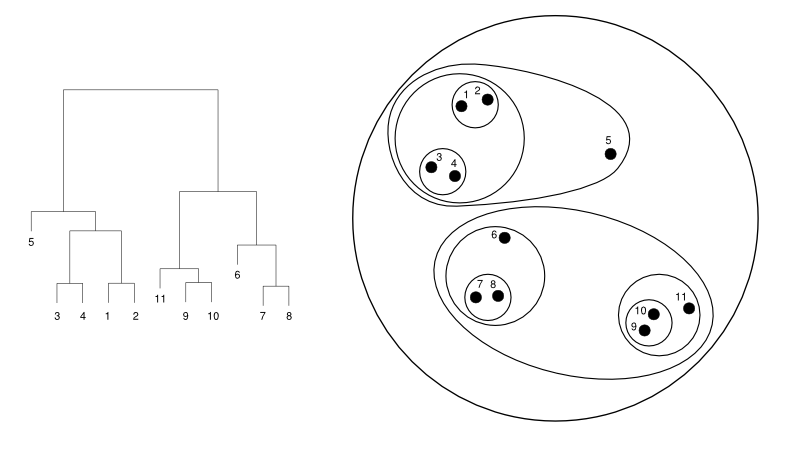


Hay dos tipos principales de ***hierarchical clustering***:
- **Aglomerativo**: Cada dato comienza como su propio grupo y el **algoritmo fusiona gradualmente pares de grupos** en función de su similitud hasta que todos los puntos de datos estén en **un solo grupo**.

- **Divisivo**:  Todos los puntos de datos comienzan en un solo grupo y el **algoritmo divide el grupo en grupos más pequeños** en función de su diferencia, hasta que cada dato esté en **su propio grupo**.

Un aspecto importante del agrupamiento jerárquico es la elección del **método de vinculación (_linkage method_)** y la **métrica de distancia (_distance metric_)** utilizada para medir la similitud entre los grupos como `Euclidean`, `Manhattan` o `Minkowski`.

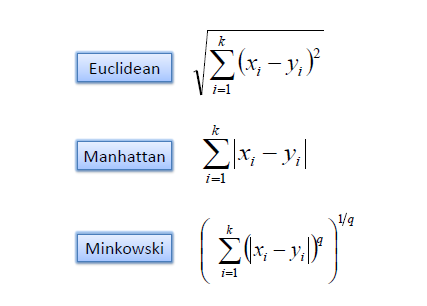


El método de vinculación o ***linkage method*** determina **cómo se calcula la distancia entre dos clústeres** en función de las distancias entre los puntos de datos de sus miembros. Los métodos de vinculación más comunes son:

- **Centroid**: la distancia entre los centros de clusters.
- **Single**: la distancia más corta entre dos puntos de datos.
- **Complete**: la distancia más larga entre dos puntos.
- **Average**: la distancia promedio entre todos los pares de puntos de datos.
- **Ward**: la suma de las distancias al cuadrado desde el centro del nuevo cluster, dentro de todos los grupos que se fusionan.

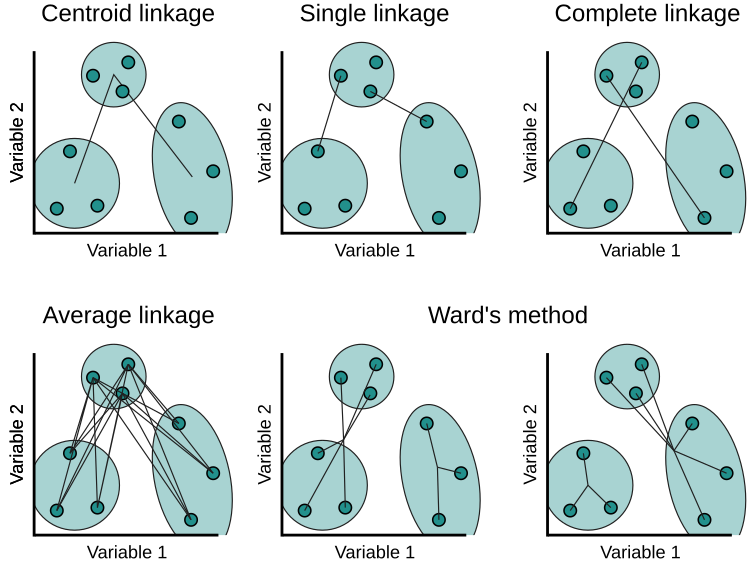

**No existe un criterio único** como otras medidas de rendimiento de clustering para calcular el número óptimo de grupos a partir de un **dendograma**. Sin embargo, puede resultar muy útil dibujar este gráfico sobre todo cuando no hay una cantidad ingente de datos.

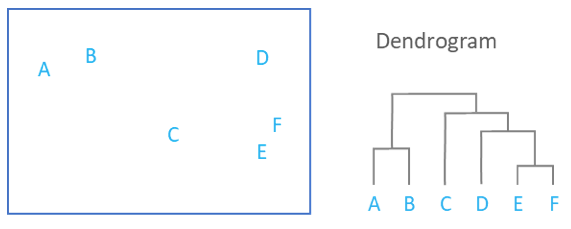

En resumen, el **eje vertical** de un dendrograma representa el **nivel de disimilitud o diferencia** entre los objetos o variables que se agrupan, mientras que el **eje horizontal** muestra los **diferentes grupos** que se forman en cada nivel del árbol y la **distancia o diferencia entre ellos**.

Para crear el dendograma debemos usar la librería ___SciPy___ aunque después para crear el algoritmo de clustering aglomorativo podemos usar la librería _sklearn_ como el resto de los modelos. Vamos a realizar un ejercicio sobre el conjunto de datos heterocedásticos.

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Realizar el método "agglomerative clustering" con la vinculación tipo "ward"
linkage_method = linkage(datos2_norm, method ='ward', metric='euclidean')

# Visualizar el dendograma y la posible línea para cortar el árbol jerarquico
Dendrogram = dendrogram(linkage_method)
plt.axhline(23, color='red', linestyle='--'); 


Considerando el número de los grupos que forman el datset, procedemos a crear el modelo final.

In [ ]:
from sklearn.cluster import AgglomerativeClustering

modelo_agg = AgglomerativeClustering(n_clusters=3, linkage='ward', metric='euclidean')

modelo_agg.fit(datos2_norm)

y_etiquetas_agg = modelo_agg.labels_

print("Silhouette score = ", silhouette_score(datos2_norm, y_etiquetas_agg))

# Graficar los resultados
sns.scatterplot(x=datos2_norm[:,0], y=datos2_norm[:,1], hue=y_etiquetas_agg)
plt.title("Agglomerative Clustering")
plt.show()

In [ ]:
y_label_agg = np.where(y_etiquetas_agg==0, 1, np.where(y_etiquetas_agg==1, 0, 2))
y_label_agg = pd.Series(y_label_agg, name='label')
y_label_agg

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(20,7))

sns.scatterplot(x=datos2_norm[:,0], y=datos2_norm[:,1], hue=etiquetas2, ax=axes[0])
axes[0].set_title("Datos sintéticos etiquetados")

sns.scatterplot(x=datos2_norm[:,0], y=datos2_norm[:,1], hue=y_label_agg, ax=axes[1])
axes[1].set_title("Datos agrupados por clustering (Agglomerative)")

plt.show()

In [ ]:
diff_pos_agg = [i for i in range(len(y_label_agg)) if y_label_agg[i]!=etiquetas2[i]]
print("El modelo de clustering se ha equivocado en clasificar %s puntos" % len(diff_pos_agg))
print("El porcentage de acierto es {acc}%".format(acc=(1-len(diff_pos_agg)/len(y_label_agg))*100))
y_label_agg[diff_pos_agg]

Podemos observar que el método de _agrupamiento jerárquico (aglomerativo)_ ha llegado a agrupar los datos heterocedásticos con una buena precisión sobre todo comparando con el método _KMeans_.  

---

## Density based clustering

El **agrupamiento basado en densidad** (_Density-based clustering_) es una técnica de clustering que identifica grupos de puntos de datos **en función de la densidad local** de puntos. La principal idea de este método es que los clústeres son **regiones de alta densidad** separadas por regiones de baja densidad.

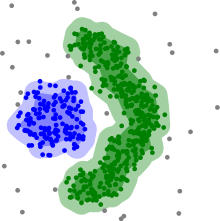



 El algoritmo de _agrupación espacial de aplicaciones con ruido basada en la densidad_ se conoce como **DBSCAN (_Density-Based Spatial Clustering of Applications with Noise_)**. En _DBSCAN_, los puntos que se encuentran en regiones de alta densidad se denominan como **puntos centrales** (_core points_) y los puntos que se encuentran en regiones de baja densidad pero que aún forman parte de un clúster se denominan **puntos de borde** (_border points_). Los puntos que no están en ningún grupo se denominan **puntos de ruido** (_noise points_).

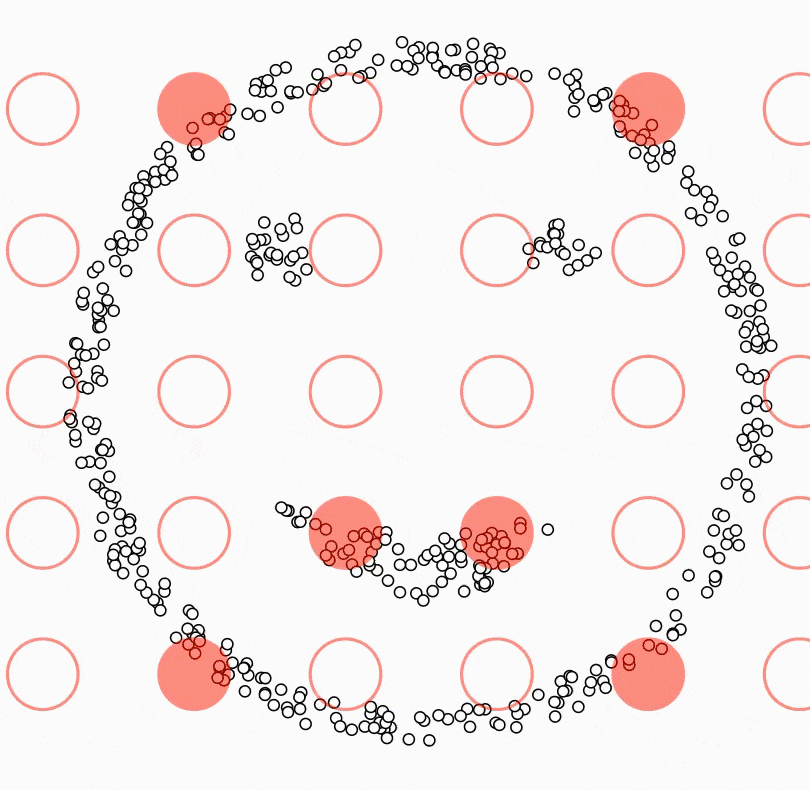

El algoritmo _DBSCAN_ toma dos parámetros principales como entrada: 
- **epsilon ($ε$)**: Representa el radio a considerar alrededor de cada punto.
- **min_samples ($minPts$)**: Representa el número mínimo de puntos necesarios para formar una región densa.

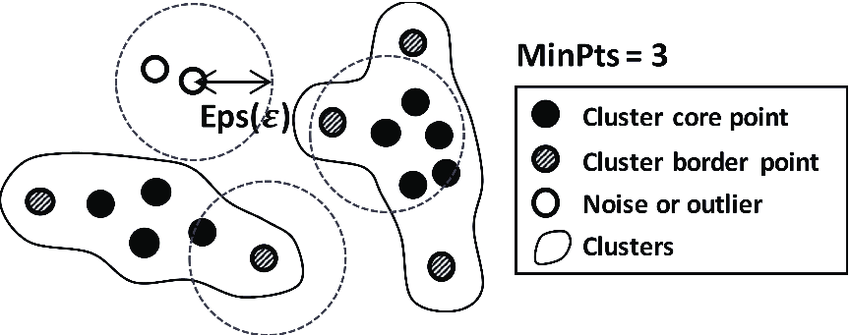

**OPTICS (_Ordering Points To Identify the Clustering Structure_)** es un algoritmo de clustering basado en la densidad que es similar a _DBSCAN_. Este modelo produce un gráfico de accesibilidad (_reachability plot_), que es una representación gráfica de la estructura de agrupamiento de datos y puede manejar conjuntos de datos con **densidades variables**. 

Ahora realizamos un ejercicio usando los datos con formas que **no sean esféricas o isotrópicas**: 

### Datasets con patrones irregulares (anisótropos)

In [ ]:
from sklearn.datasets import make_moons

datos_luna, etiquetas_luna = make_moons(n_samples=1000, noise=0.05, random_state=77)

sns.scatterplot(x=datos_luna[:,0], y=datos_luna[:,1])
plt.title("Datos sintéticos lunares")
plt.show()


In [ ]:
from sklearn.datasets import make_moons

datos_luna, etiquetas_luna = make_moons(n_samples=1000, noise=0.05, random_state=77)

sns.scatterplot(x=datos_luna[:,0], y=datos_luna[:,1], hue=etiquetas_luna)
plt.title("Datos sintéticos lunares")
plt.show()


In [ ]:
# Normalizar los datos
from sklearn.preprocessing import StandardScaler

escalado_luna = StandardScaler().fit(datos_luna)
datos_luna_norm = escalado_luna.transform(datos_luna)
datos_luna_norm

In [ ]:
# Verificar las características de los valores estandarizados
display(pd.DataFrame(datos_luna).describe().round(2))
display(pd.DataFrame(datos_luna_norm).describe().round(2))

Analizamos los diferentes métodos para ver si se puede descubrir el número de los clusters a periori.

In [ ]:
distor_clust = []
for k in range(1, 15):
    modelo_km = KMeans(n_clusters=k, random_state=100)
    modelo_km.fit(datos_luna_norm)
    distor_clust.append(modelo_km.inertia_)

# Obtener una visualización más elaborada 
plt.figure(figsize=(16, 7))
sns.lineplot(x=range(1,15), y=distor_clust, color='green', label='WSS versus K', linewidth=3)
plt.xticks(range(1,15))
plt.title("Suma de la distancia al cuadrado de cada punto a su centroide", fontsize=16)
plt.xlabel("Número de Clusters", fontsize=14)
plt.ylabel("WSS (inertia)", fontsize=14)
plt.show()

In [ ]:
sil_clust = []
for k in range(2, 15):
    modelo_km = KMeans(n_clusters=k, random_state=100)
    modelo_km.fit(datos_luna_norm)
    y_modelo_km = modelo_km.predict(datos_luna_norm)
    sil_clust.append(silhouette_score(datos_luna_norm, y_modelo_km))

# Obtener una visualización del valor de silueta
plt.figure(figsize=(16, 7))
sns.lineplot(x=range(2,15), y=sil_clust, color='green', label='silueta versus K', linewidth=3)
plt.xticks(range(1,15))
plt.title("Distancia media dentro del grupo (a) entre la distancia media del grupo más cercano (b)")
plt.xlabel("Número de Clusters", fontsize=14)
plt.ylabel("silhouette_score", fontsize=14)
plt.show()

In [ ]:
from sklearn.metrics import davies_bouldin_score
dav_clust = []
for k in range(2, 15):
    modelo_km = KMeans(n_clusters=k, random_state=100)
    modelo_km.fit(datos_luna_norm)
    y_modelo_km = modelo_km.predict(datos_luna_norm)
    dav_clust.append(davies_bouldin_score(datos_luna_norm, y_modelo_km))

# Obtener una visualización del valor de silueta
plt.figure(figsize=(16, 7))
sns.lineplot(x=range(2,15), y=dav_clust, color='green', label='the Davies-Bouldin score versus K', linewidth=3)
plt.xticks(range(1,15))
plt.title("Davies-Bouldin index")
plt.xlabel("Número de Clusters", fontsize=14)
plt.ylabel("davies_bouldin_score", fontsize=14)
plt.show()


In [ ]:
from sklearn.metrics import calinski_harabasz_score
calinsk_clust = []
for k in range(2, 15):
    modelo_km = KMeans(n_clusters=k, random_state=100)
    modelo_km.fit(datos_luna_norm)
    y_modelo_km = modelo_km.predict(datos_luna_norm)
    calinsk_clust.append(calinski_harabasz_score(datos_luna_norm, y_modelo_km))

# Obtener una visualización del valor de silueta
plt.figure(figsize=(16, 7))
sns.lineplot(x=range(2,15), y=calinsk_clust, color='green', label='Calinski and Harabasz score versus K', linewidth=3)
plt.xticks(range(1,15))
plt.title("Variance Ratio Criterion")
plt.xlabel("Número de Clusters", fontsize=14)
plt.ylabel("calinski_harabasz_score", fontsize=14)
plt.show()


In [ ]:
bic_clust = []
for k in range(2, 15):
    modelo_km = KMeans(n_clusters=k, random_state=100)
    modelo_km.fit(datos_luna_norm)
    y_modelo_km = modelo_km.predict(datos_luna_norm)
    bic_clust.append(bic_score(datos_luna_norm, y_modelo_km))

# Obtener una visualización del valor de silueta
plt.figure(figsize=(16, 7))
sns.lineplot(x=range(2,15), y=bic_clust, color='green', label='BIC score versus K', linewidth=3)
plt.xticks(range(1,15))
plt.title("Bayesian Information Criterion")
plt.xlabel("Número de Clusters", fontsize=14)
plt.ylabel("bic_score", fontsize=14)
plt.show()


In [ ]:
from sklearn.mixture import GaussianMixture

bic_gmm = []
for k in range(2, 15):
    modelo_gmm = GaussianMixture(n_components=k, random_state=100)
    modelo_gmm.fit(datos_luna_norm)
    bic_gmm.append(modelo_gmm.bic(datos_luna_norm))

# Obtener una visualización del valor de silueta
plt.figure(figsize=(16, 7))
sns.lineplot(x=range(2,15), y=bic_gmm, color='green', label='BIC score of GMM Model versus K', linewidth=3)
plt.xticks(range(2,15))
plt.title("Bayesian Information Criterion (GMM-based)")
plt.xlabel("Número de Clusters", fontsize=14)
plt.ylabel("bic_score", fontsize=14)
plt.show()

Nínguno de los criterios han sido suficientemente eficaz para calcular el número de los grupos presentes en este conjunto de datos. Probamos la creación de un modelo _Mean Shift_ 

In [ ]:
from sklearn.cluster import MeanShift

modelo_ms_luna = MeanShift(bin_seeding=True)

modelo_ms_luna.fit(datos_luna_norm)

y_etiquetas_ms_luna = modelo_ms_luna.labels_

centros_ms_luna = modelo_ms_luna.cluster_centers_

print("Silhouette score = ", silhouette_score(datos_luna_norm, y_etiquetas_ms_luna))

# Graficar los resultados
sns.scatterplot(x=datos_luna_norm[:,0], y=datos_luna_norm[:,1], hue=y_etiquetas_ms_luna)
sns.scatterplot(x=centros_ms_luna[:,0], y=centros_ms_luna[:,1], color='blue', s=60, label='cluster_centers')
plt.title("Clustering con Mean Shift")
plt.show()

In [ ]:
y_label_ms_luna= np.where(y_etiquetas_ms_luna==0, 1, 0)
y_label_ms_luna = pd.Series(y_label_ms_luna, name='label')
y_label_ms_luna

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(20,7))

sns.scatterplot(x=datos_luna_norm[:,0], y=datos_luna_norm[:,1], hue=etiquetas_luna, ax=axes[0])
axes[0].set_title("Datos sintéticos con etiquetas")

sns.scatterplot(x=datos_luna_norm[:,0], y=datos_luna_norm[:,1], hue=y_label_ms_luna, ax=axes[1])
axes[1].set_title("Datos etiquetados por clustering (Mean Shift)")

plt.show()

In [ ]:
diff_pos_ms_luna = [i for i in range(len(y_label_ms_luna)) if y_label_ms_luna[i]!=etiquetas_luna[i]]
print("El modelo de clustering se ha equivocado en clasificar %s puntos" % len(diff_pos_ms_luna))
print("El porcentage de acierto es {acc}%".format(acc=(1-len(diff_pos_ms_luna)/len(y_label_ms_luna))*100))
y_label_ms_luna[diff_pos_ms_luna]

Ahora desarrollamos un algoritmo de _K-Means clustering_ suponiendo conocer previamente el número de los grupos existentes en los datos.

In [ ]:
from sklearn.cluster import KMeans

modelo_km_luna = KMeans(n_clusters=2, random_state=100)

modelo_km_luna.fit(datos_luna_norm)

y_km_luna = modelo_km_luna.labels_

centros_km_luna = modelo_km_luna.cluster_centers_

print("SSE = ", modelo_km_luna.inertia_)
print("Silhouette score = ", silhouette_score(datos_luna_norm, y_km_luna))

# Graficar los resultados
sns.scatterplot(x=datos_luna_norm[:,0], y=datos_luna_norm[:,1], hue=y_km_luna)
sns.scatterplot(x=centros_km_luna[:,0], y=centros_km_luna[:,1], color='blue', s=60, label='cluster_centers')
plt.title("Clustering con K-means")
plt.show()

In [ ]:
y_label_km_luna = np.where(y_km_luna==0, 1, 0)
y_label_km_luna = pd.Series(y_label_km_luna, name='label')
y_label_km_luna

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(20,7))

sns.scatterplot(x=datos_luna_norm[:,0], y=datos_luna_norm[:,1], hue=etiquetas_luna, ax=axes[0])
axes[0].set_title("Datos sintéticos etiquetados")

sns.scatterplot(x=datos_luna_norm[:,0], y=datos_luna_norm[:,1], hue=y_label_km_luna, ax=axes[1])
axes[1].set_title("Datos agrupados por clustering (K-Means)")

plt.show()

In [ ]:
diff_pos_km_luna = [i for i in range(len(y_label_km_luna)) if y_label_km_luna[i]!=etiquetas_luna[i]]
print("El modelo de clustering se ha equivocado en clasificar %s puntos" % len(diff_pos_km_luna))
print("El porcentage de acierto es {acc}%".format(acc=(1-len(diff_pos_km_luna)/len(y_label_km_luna))*100))
y_label_km_luna[diff_pos_km_luna]

Vamos a comprobar los algoritmos de agrupamiento basados en la densidad local de puntos de datos.

In [ ]:
from sklearn.cluster import DBSCAN

modelo_dbscan = DBSCAN()

modelo_dbscan.fit(datos_luna_norm)

y_etiquetas_dbscan = modelo_dbscan.labels_

print("Silhouette score = ", silhouette_score(datos_luna_norm, y_etiquetas_dbscan))

# Graficar los resultados
sns.scatterplot(x=datos_luna_norm[:,0], y=datos_luna_norm[:,1], hue=y_etiquetas_dbscan)
plt.title("DBSCAN - Density-Based Spatial Clustering of Applications with Noise")
plt.show()

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(20,7))

sns.scatterplot(x=datos_luna_norm[:,0], y=datos_luna_norm[:,1], hue=etiquetas_luna, ax=axes[0])
axes[0].set_title("Datos sintéticos con etiquetas")

sns.scatterplot(x=datos_luna_norm[:,0], y=datos_luna_norm[:,1], hue=y_etiquetas_dbscan, ax=axes[1])
axes[1].set_title("Datos etiquetados por clustering (DBSCAN)")

plt.show()

In [ ]:
diff_pos_dbscan_luna = [i for i in range(len(y_etiquetas_dbscan)) if y_etiquetas_dbscan[i]!=etiquetas_luna[i]]
print("El modelo de clustering se ha equivocado en clasificar %s puntos" % len(diff_pos_dbscan_luna))
print("El porcentage de acierto es {acc}%".format(acc=(1-len(diff_pos_dbscan_luna)/len(y_etiquetas_dbscan))*100))
y_etiquetas_dbscan[diff_pos_dbscan_luna]

Vemos que el resultado es ideal en caso del modelo _DBSCAN_. Probamos generar un modelo con otro tipo de algoritmos similares.

In [ ]:
from sklearn.cluster import OPTICS

modelo_optics = OPTICS()

modelo_optics.fit(datos_luna_norm)

y_etiquetas_optics = modelo_optics.labels_

print("Silhouette score = ", silhouette_score(datos_luna_norm, y_etiquetas_optics))

# Graficar los resultados
sns.scatterplot(x=datos_luna_norm[:,0], y=datos_luna_norm[:,1], hue=y_etiquetas_optics)
plt.title("OPTICS - Ordering Points To Identify the Clustering Structure")
plt.show()

Esta vez ajustamos los parámetros del modelo _OPTICS_.

In [ ]:
from sklearn.cluster import OPTICS

modelo_optics = OPTICS(min_samples=7, xi=0.1, min_cluster_size=0.2)

modelo_optics.fit(datos_luna_norm)

y_etiquetas_optics = modelo_optics.labels_

print("Silhouette score = ", silhouette_score(datos_luna_norm, y_etiquetas_optics))

# Graficar los resultados
sns.scatterplot(x=datos_luna_norm[:,0], y=datos_luna_norm[:,1], hue=y_etiquetas_optics)
plt.title("OPTICS - Ordering Points To Identify the Clustering Structure")
plt.show()

Como se puede observar, el rendimiento del modelo _OPTICS_ a diferencia del modelo _DBSCAN_ depende en gran medida de la elección de **parámetros** como las **muestras mínimas (*min_samples*)** y el **tamaño mínimo de los clusters (*min_cluster_size*)**.

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(20,7))

sns.scatterplot(x=datos_luna_norm[:,0], y=datos_luna_norm[:,1], hue=etiquetas_luna, ax=axes[0])
axes[0].set_title("Datos sintéticos con etiquetas")

sns.scatterplot(x=datos_luna_norm[:,0], y=datos_luna_norm[:,1], hue=y_etiquetas_optics, ax=axes[1])
axes[1].set_title("Datos etiquetados por clustering (OPTICS)")

plt.show()

In [ ]:
diff_pos_optics_luna = [i for i in range(len(y_etiquetas_optics)) if y_etiquetas_optics[i]!=etiquetas_luna[i]]
print("El modelo de clustering se ha equivocado en clasificar %s puntos" % len(diff_pos_optics_luna))
print("El porcentage de acierto es {acc}%".format(acc=(1-len(diff_pos_optics_luna)/len(y_etiquetas_optics))*100))
y_etiquetas_optics[diff_pos_optics_luna]

Estos puntos que se han etiquetado como $-1$ se consideran como **ruidos** en el ejercicio de agrupamiento. 

---

### Datasets con patrones no lineales

Vamos a realizar un ejercicio de cluestring con datos irregulares que presentan una no linealidad alta.

In [ ]:
from sklearn.datasets import make_circles

datos_cir, etiquetas_cir = make_circles(n_samples=1000, factor=0.5, noise=0.05, random_state=99)

plt.figure(figsize=(10,10))
sns.scatterplot(x=datos_cir[:,0], y=datos_cir[:,1])
plt.title("Datos sintéticos circulares")
plt.show()


In [ ]:
from sklearn.datasets import make_circles

datos_cir, etiquetas_cir = make_circles(n_samples=1000, factor=0.5, noise=0.05, random_state=99)

plt.figure(figsize=(10,10))
sns.scatterplot(x=datos_cir[:,0], y=datos_cir[:,1], hue=etiquetas_cir)
plt.title("Datos sintéticos circulares")
plt.show()


Aquí se puede ver que no hay una necesidad importante para normalizar los datos

In [ ]:
pd.DataFrame(datos_cir).describe().round(2)

### **`Ejercicio 22.1`**

**`22.1.1`** Utiliza las distintas técnicas de análisis de calidad de clustering para ver si se puede estimar a periori el número de los grupos de datos presentes en este data set:

 - WSS (Elbow method)
 - Silhouette score
 - Davies-Bouldin index
 - Calinski and Harabasz score
 - BIC score
 - BIC score of GMM
 - `random_state=100`

**`22.1.2`** Considerando que el número óptimo de clusters para estos datos sería dos (_k=2_), crea diferentes modelos de clustering, genera las gráficas de cada modelo, dibuja la comparación con el dataset original y calcula sus **porcentages de aciertos** para analizar y **comparar los resultados** obtenidos:  

 - Mean Shift
 - K-means
 - GMM
 - Agglomerative (`linkage='ward', metric='euclidean'`)
 - Agglomerative (`linkage='single', metric='euclidean'`)
 - DBSCAN (`eps=0.25`)
 - OPTICS (`min_samples=7, xi=0.1, min_cluster_size=0.2`)

---